In [10]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
data=pd.read_csv("RBO-Role-Repayment.csv")

In [12]:
ar_rank=data[data['ROLES']=='ARCHITECT']
te_rank=data[data['ROLES']=='TECHNICAL']
ma_rank=data[data['ROLES']=='MANAGEMENT']

In [13]:
roles=['ARCHITECT','TECHNICAL','MANAGEMENT']
p_values=np.arange(0.5, 0.98, 0.01)

In [14]:
rboDF=pd.DataFrame(columns = ['roles' , 'p', 'RBO'])
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['ROLES']==roles[i]]['REPAYMENT'], data[data['ROLES']==roles[j]]['REPAYMENT'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'roles':roles[i]+"-"+roles[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [15]:
rbo_ext=rbo.rbo(data[data['ROLES']==roles[0]]['REPAYMENT'], data[data['ROLES']==roles[1]]['REPAYMENT'], p=0.95)
rbo_ext

{'min': 0.4483574118737742,
 'res': 0.22698281902170264,
 'ext': 0.5803866494370562}

In [16]:
rboDF.sample(5)

,roles,p,RBO
64,MANAGEMENT-ARCHITECT,0.66,0.741199
69,MANAGEMENT-ARCHITECT,0.71,0.722745
27,TECHNICAL-ARCHITECT,0.77,0.589736
115,MANAGEMENT-TECHNICAL,0.69,0.652400
110,MANAGEMENT-TECHNICAL,0.64,0.665547


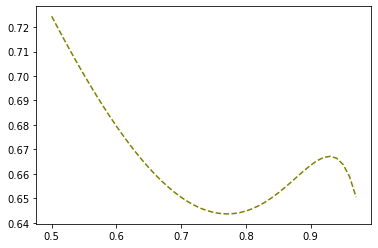

In [17]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']=='MANAGEMENT-TECHNICAL'], color='olive', linestyle='dashed', label=roles[i]+"-"+roles[j])

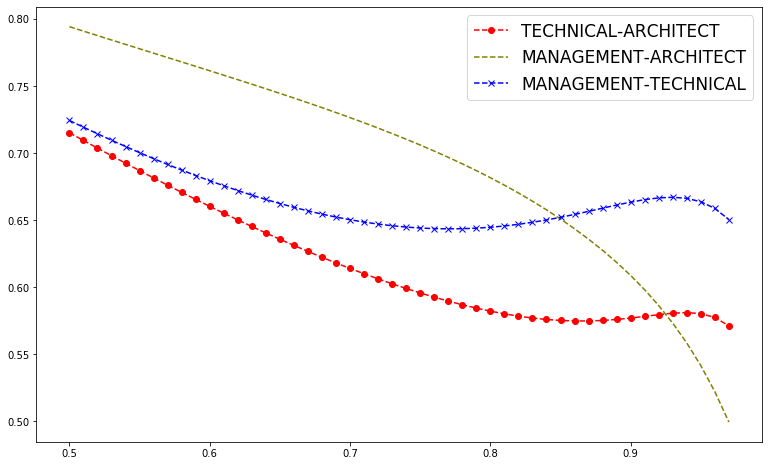

In [18]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            
            pair=roles[i]+"-"+roles[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 17})


In [19]:
rbo.rbo(ma_rank['REPAYMENT'], ar_rank['REPAYMENT'], p=.5)

{'min': 0.7944235118121314,
 'res': 1.623101371724091e-06,
 'ext': 0.7944254452983356}

In [20]:
rbo.rbo(ma_rank['REPAYMENT'], ar_rank['REPAYMENT'], p=.97)

{'min': 0.35145856593008434,
 'res': 0.41389461251291576,
 'ext': 0.4995225302071171}

In [12]:
rbo.rbo(te_rank['REPAYMENT'], ar_rank['REPAYMENT'], p=.5)

{'min': 0.7282936515996967,
 'res': 4.0000399738833547e-08,
 'ext': 0.7282937145425193}

In [21]:
rbo.rbo(te_rank['REPAYMENT'], ar_rank['REPAYMENT'], p=.5)

{'min': 0.7153123705025957,
 'res': 1.6220833121651017e-06,
 'ext': 0.7153138123878064}

In [22]:
rbo.rbo(te_rank['REPAYMENT'], ar_rank['REPAYMENT'], p=.97)

{'min': 0.37033271320033756,
 'res': 0.38865725088111513,
 'ext': 0.5712586969394341}

In [23]:
rbo.rbo(te_rank['REPAYMENT'], ma_rank['REPAYMENT'], p=.5)

{'min': 0.724447260016774,
 'res': 1.045500113090336e-09,
 'ext': 0.7244472610586}

In [13]:
rbo.rbo(te_rank['REPAYMENT'], ma_rank['REPAYMENT'], p=.97)

{'min': 0.742676383174528,
 'res': 2.1520454713438013e-09,
 'ext': 0.7426763851703548}